In [20]:
"""
Jason Qin

Visualize loss and IOU of training
"""

'\nJason Qin\n\nVisualize loss and IOU of training\n'

In [19]:
import numpy as np
import argparse
import os
from subprocess import check_call
import sys
import re
import matplotlib.pyplot as plt

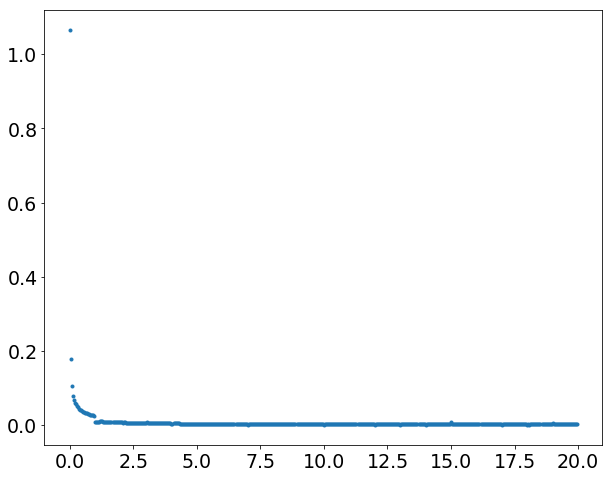

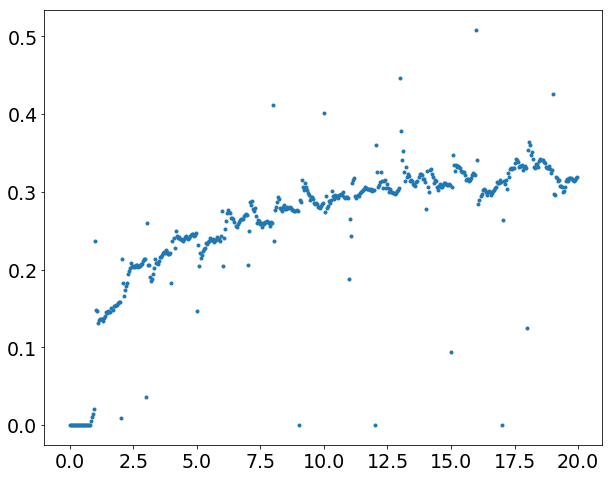

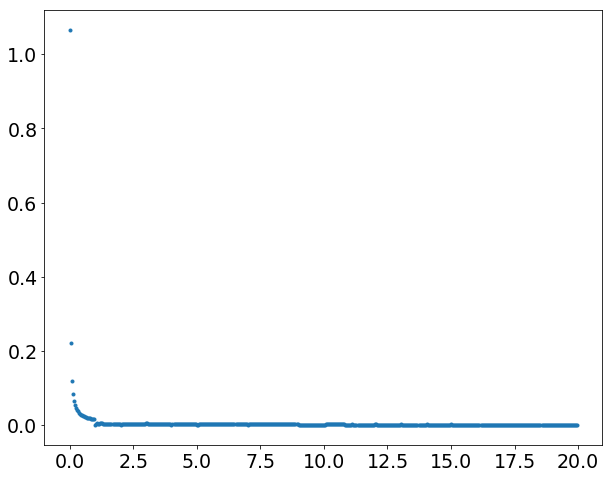

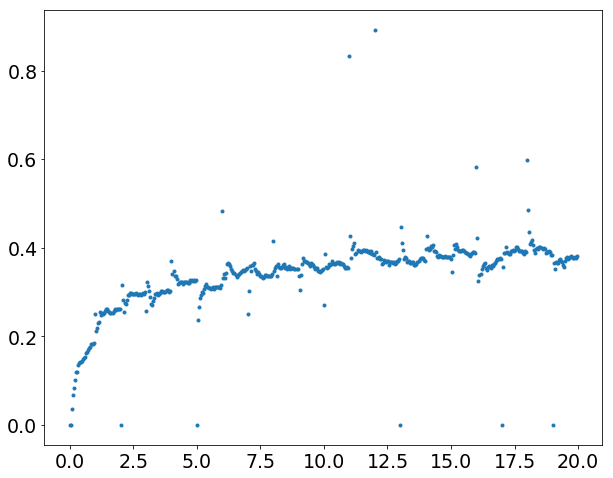

In [75]:
"""Visualize architecture loss and IOU over time"""
# encoders = ['resnet50', 'resnext101']
# decoders = ['c1', 'ppm', 'upernet']
encoders = ['resnet50']
decoders = ['upernet']
# trainId = ['', '2', '3']
# upsampleId = ['10x', '100x']
learningRates = ['0.2', '0.002']

allLosses = []
allIous = []
for encoder in encoders:
    for decoder in decoders:
        for lr in learningRates:
        # for u in upsampleId:
        # for t in trainId:
            losses = []
            ious = []
            logFile = '/home/ky_aneur/cs230/code/resnet/semantic-segmentation-pytorch/training_outputs/learning_rate/{}_{}_{}.txt'.format(encoder, decoder, lr)
            # logFile = '/home/ky_aneur/cs230/code/resnet/semantic-segmentation-pytorch/training_outputs/upsampling/{}_{}_{}.txt'.format(encoder, decoder, u)
            # logFile = '/home/ky_aneur/cs230/code/resnet/semantic-segmentation-pytorch/training_outputs/arch/{}_{}.txt'.format(encoder, decoder)
            # logFile = '/home/ky_aneur/cs230/code/resnet/semantic-segmentation-pytorch/training_outputs/loss_weights/{}_{}_train{}.txt'.format(encoder, decoder, t)
            lines = [line.rstrip('\n') for line in open(logFile, 'r')]
            for line in lines:
                lossRe = re.compile('Loss: \d\.\d*')
                loss = lossRe.search(line)
                if loss is not None:
                    loss = loss.group(0)
                    loss = loss.split(' ')[1]
                    losses.append(loss)

                iouRe = re.compile('IOU: \d\.\d*')
                iou = iouRe.search(line)
                if iou is not None:
                    iou = iou.group(0)
                    iou = iou.split(' ')[1]
                    ious.append(iou)

            epochs = np.array(range(len(ious)))
            epochs = epochs / (500/20.)
            losses = np.array(losses).astype(np.float)
            ious = np.array(ious).astype(np.float)
            allLosses.append(losses)
            allIous.append(ious)
            plt.plot(epochs, losses, label='Loss', marker='.', linestyle='')
            plt.show()
            plt.plot(epochs, ious, label='IOU', marker='.', linestyle='')
            plt.show()

allLosses = np.array(allLosses).T
allIous = np.array(allIous).T

In [ ]:
# Visualize architecture variation data
encoders = ['ResNet50']#, 'resnext101']
# decoders = ['Conv', 'PPM', 'UPerNet']
decoders = ['UPerNet']

for i in range(len(encoders)):
    encoder = encoders[i]
    for j in range(len(decoders)):
        decoder = decoders[j]
        losses = allLosses[:, i*3 + j]
        plt.plot(epochs, losses, label='{}-{}'.format(encoder, decoder), marker='.', linestyle='')
    
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 19
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(markerscale=3)
plt.show()

for i in range(len(encoders)):
    encoder = encoders[i]
    for j in range(len(decoders)):        
        print([np.average(allIous[k*25:(k+1)*25, i*3 + j]) for k in range(20)])
        decoder = decoders[j]
        ious = allIous[:, i*3 + j]
        plt.plot(epochs, ious, label='{}-{}'.format(encoder, decoder), marker='.', linestyle='')

plt.xlabel('Epoch')
plt.ylabel('Training IOU')
plt.legend(markerscale=3)
plt.show()

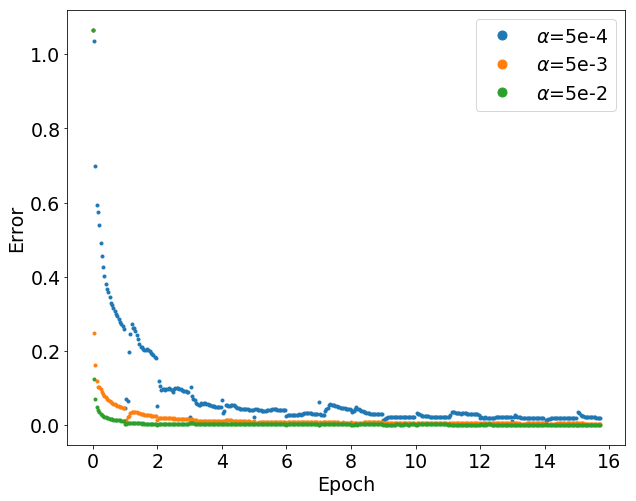

[0.00376128, 0.0115886, 0.0150616, 0.024634519999999997, 0.02675752, 0.027248680000000004, 0.0373462, 0.027488600000000002, 0.03360292, 0.05297376, 0.044003320000000005, 0.0432226, 0.045523799999999996, 0.049358759999999995, 0.05013667999999999]
[0.0441134, 0.06824019999999999, 0.0882104, 0.11226564000000001, 0.12323564000000001, 0.14042384, 0.15213196, 0.163372, 0.16177428, 0.16637916, 0.20084256000000003, 0.19513992, 0.21265895999999998, 0.20763592000000003, 0.20882876000000003]
[0.13438836, 0.2452246, 0.26854372000000004, 0.27002432000000004, 0.31892296, 0.30632420000000005, 0.33733776, 0.33018332, 0.33372056, 0.3460961999999999, 0.35290620000000006, 0.38708204, 0.38790968, 0.37294155999999995, 0.37870852000000005]


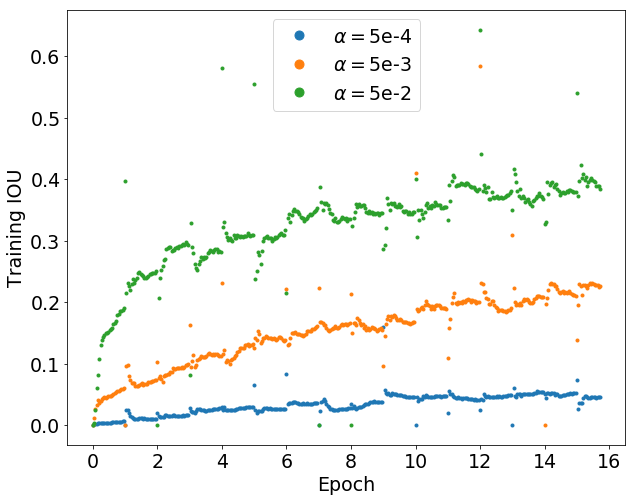

In [69]:
# Visualize loss weight data 
trainId = ['', '2', '3']
lossWeights = ['5e-4', '5e-3', '5e-2']

for i in range(len(trainId)):
    losses = lossWeightLosses[i]
    plt.plot(epochs, losses[:len(epochs)], label=r'$\alpha$={}'.format(lossWeights[i]), marker='.', linestyle='')
    
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 19
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(markerscale=3)
plt.show()

for i in range(len(trainId)):
    ious = lossWeightIOUs[i]
    print([np.average(ious[k*25:(k+1)*25]) for k in range(15)])
    plt.plot(epochs, ious[:len(epochs)], label=r'$\alpha=${}'.format(lossWeights[i]), marker='.', linestyle='')

plt.xlabel('Epoch')
plt.ylabel('Training IOU')
plt.legend(markerscale=3)
plt.show()

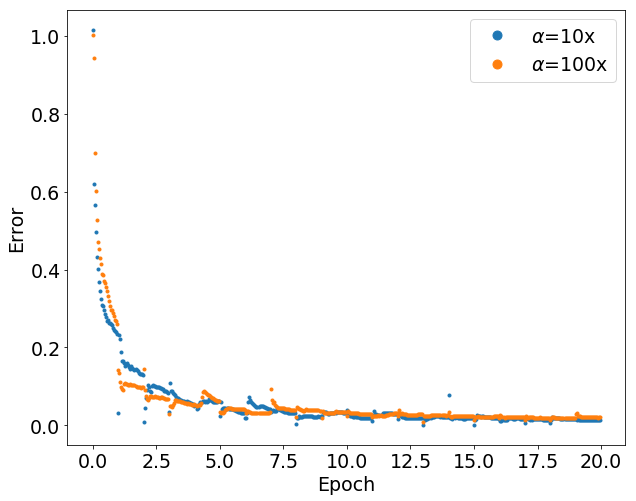

[0.0023938, 0.00917392, 0.0115354, 0.01408308, 0.013215279999999998, 0.016476920000000003, 0.01831356, 0.02133204, 0.02245088, 0.014738679999999999, 0.024182839999999997, 0.017654279999999998, 0.021409199999999996, 0.01899296, 0.024329120000000003, 0.0213778, 0.023898919999999997, 0.023771639999999997, 0.02374076, 0.027215800000000002]
[0.0067212800000000005, 0.021857439999999995, 0.02586856, 0.030961799999999998, 0.03005868, 0.040731720000000006, 0.04407764, 0.036111080000000004, 0.040940319999999995, 0.05062868000000001, 0.05097804000000001, 0.06273567999999999, 0.052944000000000005, 0.06135092, 0.06003508, 0.06847716, 0.06372592, 0.0699492, 0.0706752, 0.06615947999999999]


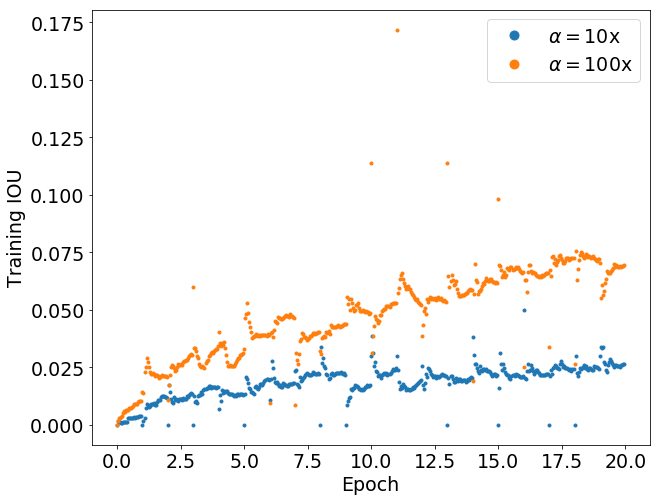

In [73]:
# Visualize upsampling data
upsampleId = ['10x', '100x']
# upsampleLosses = allLosses
# upsampleIous = allIous

for i in range(len(upsampleId)):
    losses = upsampleLosses[:, i]
    plt.plot(epochs, losses, label=r'$\alpha$={}'.format(upsampleId[i]), marker='.', linestyle='')
    
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 19
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(markerscale=3)
plt.show()

for i in range(len(upsampleId)):
    ious = upsampleIous[:, i]
    print([np.average(ious[k*25:(k+1)*25]) for k in range(20)])
    plt.plot(epochs, ious, label=r'$\alpha=${}'.format(upsampleId[i]), marker='.', linestyle='')

plt.xlabel('Epoch')
plt.ylabel('Training IOU')
plt.legend(markerscale=3)
plt.show()

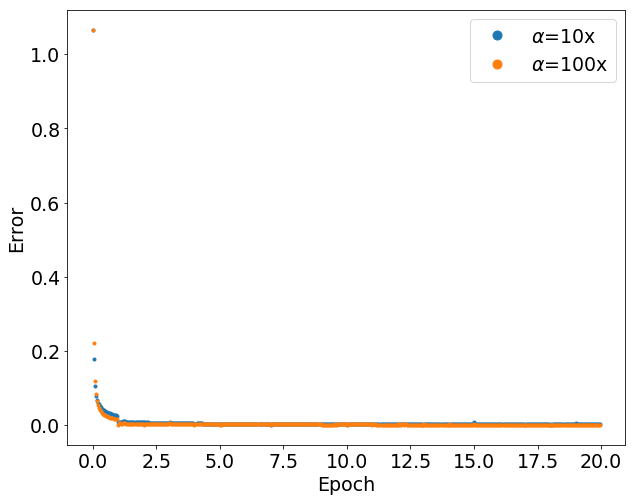

[0.0020014, 0.14921524, 0.19207340000000003, 0.20552020000000001, 0.23891743999999998, 0.22887288000000003, 0.26237056, 0.26304888000000004, 0.28321756, 0.28056236, 0.29619244, 0.29433555999999994, 0.29617772, 0.32727851999999996, 0.31064972, 0.31513428, 0.31169275999999996, 0.3125562, 0.33023876, 0.31628880000000004]
[0.13057992000000002, 0.25111952000000004, 0.28055112, 0.29594332, 0.32818756, 0.29101172000000003, 0.35243420000000003, 0.3376146, 0.35690607999999996, 0.35518696, 0.35916932, 0.41118308, 0.39144184000000004, 0.36130908, 0.38892315999999993, 0.38931532, 0.3708187599999999, 0.37520932000000007, 0.41020276, 0.35711032000000004]


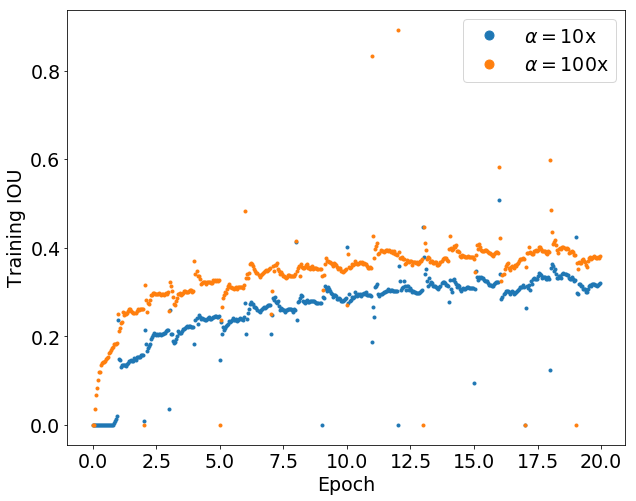

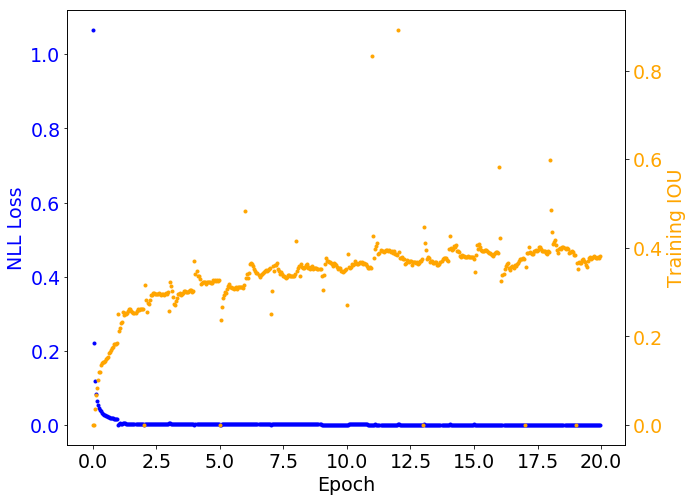

In [83]:
# Visualize learning rate data
learningRates = ['0.2', '0.002']
# learningRateLosses = allLosses
# learningRateIous = allIous

for i in range(len(upsampleId)):
    losses = learningRateLosses[:, i]
    plt.plot(epochs, losses, label=r'$\alpha$={}'.format(upsampleId[i]), marker='.', linestyle='')
    
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 19
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(markerscale=3)
plt.show()

for i in range(len(upsampleId)):
    ious = learningRateIous[:, i]
    print([np.average(ious[k*25:(k+1)*25]) for k in range(20)])
    plt.plot(epochs, ious, label=r'$\alpha=${}'.format(upsampleId[i]), marker='.', linestyle='')

plt.xlabel('Epoch')
plt.ylabel('Training IOU')
plt.legend(markerscale=3)
plt.show()

fig, ax1 = plt.subplots()
ax1.plot(epochs, losses, marker='.', linestyle='', color='blue')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('NLL Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.set_ylabel('Training IOU', color='orange')
ax2.plot(epochs, ious, marker='.', linestyle='', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.show()